In [1]:
import pandas as pd
import numpy as np
#Loading the data set 
df=pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
#Removing unwanted columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Renaming the column
df=df.rename(columns = {"v1":"type", "v2":"text"})
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Count the number of spam and ham(legitimate) texts
typeCount= df.type.value_counts()
typeCount

ham     4825
spam     747
Name: type, dtype: int64

C:\Users\Yoganandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

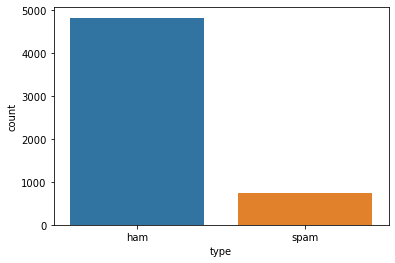

In [5]:
#Count plot of diagnosis
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['type'])

In [6]:
#Assigning feature variables and target variable
X = df['text'].values
y = df['type'].values

In [7]:
from sklearn.model_selection import train_test_split
#Split the data set into training and testing set with 30% of data as test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3900,) (1672,) (3900,) (1672,)


In [8]:
#vectorize the text
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB
#Train the Naive Bayes classifier
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [10]:
#Testing the NB model with test data
pred=classifier.predict(X_test)
pred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#Print classification report, confusion matrix and accuracy score
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1454
        spam       0.96      0.91      0.93       218

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

[[1445    9]
 [  19  199]]
0.9832535885167464


In [12]:
#Testing with new data and checking manually
#Creating sample texts with 1 spam and 1 ham
ex=['Win free gifts  by clicking the link','Hey John! shall we meet for dinner tomorrow?']
#Vectorizing the sample and predicting using the trained NB model
ex_counts=vectorizer.transform(ex)
classifier.predict(ex_counts)

array(['spam', 'ham'], dtype='<U4')

In [ ]:
#This model predicts the test data with 98% accuracy